In [1]:
!pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%run dados_incrementais_csv_original.ipynb
%run utils.ipynb

In [4]:
def exploracao_dados(caminho_arquivo):
    try:
        # leia os dados CSV indicados no site da FIAP
        dados = pd.read_csv(caminho_arquivo, encoding='latin-1')

        # aqui chamo a função incrementar_dados_aleatorios, para aumentar o volume da variável dados
        dados = incrementar_dados_aleatorios_csv(dados)
        
        print("\nDados após incremento dinâmico:\n\n", dados)
        print('-' * 100)
        print(dados.info())
        print('-' * 100)
        print("\nValor booleano (true ou false) dos missing por linha:\n\n", dados.isnull())
        print('-' * 100)
        print("\nQuantidade de valores ausentes por coluna:\n\n", dados.isnull().sum())
        print('-' * 100)
        print("\nTodas as linhas com valores missing por coluna:\n\n", dados[pd.isnull(dados['Idade'])])
        print('-' * 100)
        print("\nPorcentagem de dados ausentes por coluna:\n\n", dados.isnull().mean())
        print('-' * 100)
        
        # Calcular a média das idades
        media_idades = dados['Idade'].mean()

        print(f'\nA média das idades é: {media_idades:.2f}')
        print('-' * 100)

        # Aplicar a função para categorizar IMC e criar uma nova coluna 'Categoria IMC'
        dados['Categoria IMC'] = dados['IMC'].apply(categorizar_imc)

        # Contar o número de ocorrências de algumas colunas
        distribuicao_genero = dados['Gênero'].value_counts()
        distribuicao_imc = dados['Categoria IMC'].value_counts()
        distribuicao_filhos = dados['Filhos'].value_counts().sort_index()
       
        print("\nDistribuição de Gênero:\n\n", distribuicao_genero)
        print('-' * 100)

        # Criar uma figura e uma grade de subplots
        fig, axs = plt.subplots(2, 3, figsize=(20, 15))

        # Ajustar o espaçamento entre os subplots
        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

        montar_grafico_barra_vertical(distribuicao_genero, axs[0, 0], 'Distribuição de Gênero', 'Gênero', 'Número de Pessoas')
        
        montar_grafico_histograma_idade(dados, axs[0, 1], 'Distribuição de Idade com Linha de Tendência', 'Idade', 'Densidade')

        montar_grafico_pizza(distribuicao_imc, axs[0, 2], 'Distribuição de IMC')

        montar_grafico_barra_horizontal(distribuicao_filhos, axs[1, 0], 'Distribuição do Número de Filhos', 'Número de Filhos', 'Frequência')

        montar_grafico_correlacao(dados['Filhos'], dados['Encargos'], axs[1, 1],
                                  'Correlação entre Número de Filhos e Encargos Médicos', 'Número de Filhos', 'Encargos Médicos')

        # Calcula a correlação
        correlacao_filhos_encargos = dados['Filhos'].corr(dados['Encargos'])
        print("\nCorrelação entre Número de Filhos e Encargos Médicos:\n", correlacao_filhos_encargos)
        print('-' * 100)       

        # Eliminando o subplot na última linha e última coluna (posição 1, 2)
        axs[-1, -1].axis('off')

        # Mostra os gráficos
        plt.show()
    except FileNotFoundError:
        print("O arquivo CSV não foi encontrado.")
    except Exception as e:
        print("Ocorreu um erro durante a leitura do arquivo CSV:", e)

Dados antes da concatenação:

    Idade     Gênero        IMC  Filhos Fumante    Região      Encargos
0     56   feminino  29.774374       2     sim  sudoeste  31109.889763
1     46  masculino  25.857395       1     não  nordeste  26650.702647
2     32  masculino  23.014840       0     não  sudoeste  21459.037990
----------------------------------------------------------------------------------------------------

Dados após incremento dinâmico:

      Idade     Gênero        IMC  Filhos Fumante    Região      Encargos
0     56.0   feminino  29.774374       2     sim  sudoeste  31109.889763
1     46.0  masculino  25.857395       1     não  nordeste  26650.702647
2     32.0  masculino  23.014840       0     não  sudoeste  21459.037990
3      NaN        nan        NaN       0     nan       nan           NaN
4     54.0  masculino  24.516566       1     sim  nordeste  34492.901245
..     ...        ...        ...     ...     ...       ...           ...
198   64.0   feminino  18.957889      

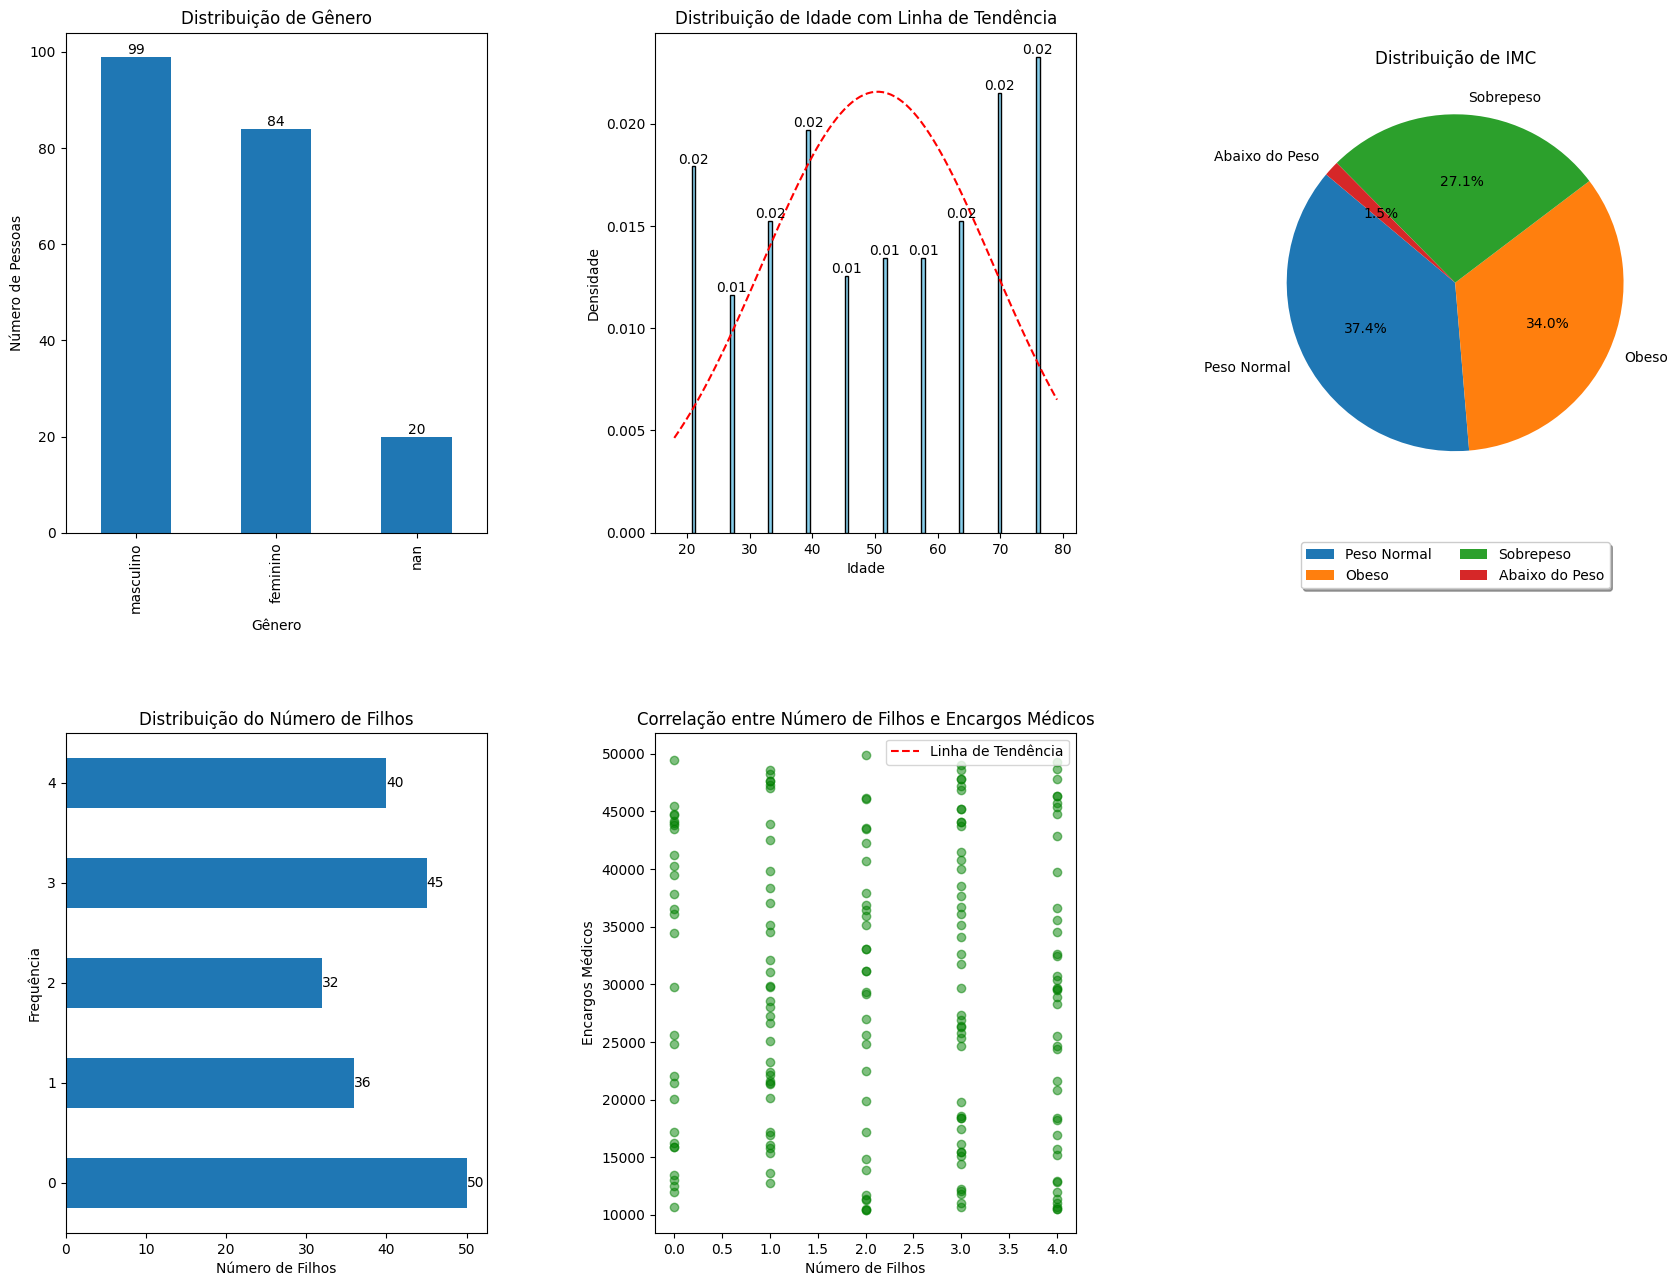

In [5]:
# Exemplo de uso
caminho_do_arquivo = 'base_dados.csv'
exploracao_dados(caminho_do_arquivo)